<a href="https://colab.research.google.com/github/litimamine/ML/blob/master/OMG_ML_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### $$ OMG - Games Dataset $$  

### Steps Implemented: 
- Importation of necessary Packages and libraries 
- Data Preprocessing : Data Exploration, labels Encoding, Data scaling & null values replacement. 
-  Application of different Classification ML models.
- Testing models over the test set
- Models accuracy comparison and selection of the one with highest accuracy 
- exploration of model output using Confusion matrix
- Exploration of the Model blackbox ( lime and shap ) to check the contribution of each factor. 
- Vizualization of results

In [ ]:
# import pandas and numpy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient 
import seaborn as sns
!pip install pycaret[full]==2.3.0
!pip install -U sklearn



     |████████████████████████████████| 645kB 7.8MB/s 
     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
ERROR: ray 1.3.0 has requirement protobuf>=3.15.3, but you'll have protobuf 3.12.4 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


Requirement already up-to-date: sklearn in /usr/local/lib/python3.7/dist-packages (0.0)


In [ ]:

games = pd.read_csv('GamesFactor_MetaData.csv')
games=games.iloc[:,1:]

# Data Preprocessing

overview of the games dataset

In [ ]:
games.describe()

,num_likes,num_Fav,timespent,num_views,Tower Defense,Big kids,Action,Strategy,Endless,Kids,Family,Puzzle,Educational,Memory,Young Kids,Sports,Word,Adventure,Board,Cards,Match 3,Multiplayer,Platformer,Aktion
count,274.000000,274.000000,274.00000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,1.324818,1.328467,2764.59854,26.178832,0.032847,0.186131,0.306569,0.182482,0.215328,0.255474,0.638686,0.354015,0.131387,0.036496,0.160584,0.164234,0.040146,0.178832,0.102190,0.043796,0.091241,0.051095,0.054745,0.003650
std,4.124479,7.820898,9576.71803,75.184857,0.178561,0.389925,0.461913,0.386948,0.411802,0.436926,0.481260,0.479089,0.338441,0.187865,0.367819,0.371165,0.196661,0.383913,0.303452,0.205015,0.288478,0.220594,0.227897,0.060412
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,162.50000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,640.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1667.50000,23.750000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52.000000,118.000000,101770.00000,967.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Categorizing games into active and inactive based on timespent

for x in range(len(games)):
  if games.timespent[x]>= 600:
    games.timespent[x]= 1
  else:
    games.timespent[x]=0

In [ ]:
failed_games=games.loc[games.timespent==0,:]
failed_games=failed_games.rename(columns={'timespent':'success'})
failed_games.to_csv('failed games.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
games['kind'] = labelencoder.fit_transform(games['kind'])
games['title'] = labelencoder.fit_transform(games['title'])
# dropping unnecessary columns for noise elimination


In [ ]:
games.drop(['game_id','num_likes','title','num_views','num_Fav'], axis='columns', inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

# Scale only columns that have values grater than 1 
to_scale = [col for col in games.columns if games[col].max() > 1]
mms = MinMaxScaler()

scaled = mms.fit_transform(games[to_scale]) 
scaled = pd.DataFrame(scaled, columns = to_scale)

# replace original columns with scaled ones 

for col in scaled: 
  games[col] = scaled[col]  
games.head() 

,kind,timespent,Tower Defense,Big kids,Action,Strategy,Endless,Kids,Family,Puzzle,Educational,Memory,Young Kids,Sports,Word,Adventure,Board,Cards,Match 3,Multiplayer,Platformer,Aktion
0,0.9375,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.3750,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.4375,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,0.4375,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.8125,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


## Creating train and test sets: 

In [ ]:
# Splitting data into train and test sets: 
from sklearn.model_selection import train_test_split

X = games.drop('timespent', axis=1)
y = games['timespent']

x_train, x_test,  y_train, y_test = train_test_split(X, y, test_size = 0.25 )


## Observing the imbalance of Data: 

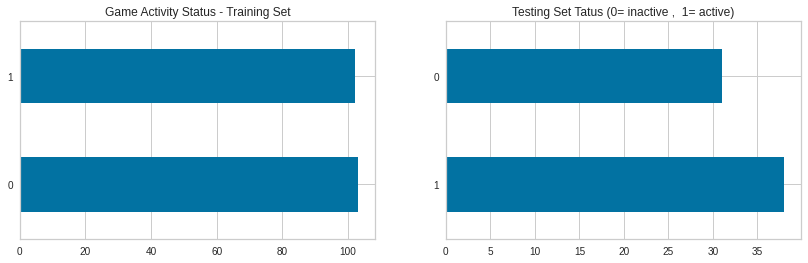

In [ ]:
fig = plt.rcParams["figure.figsize"] = (14,4) 

plt.subplot(1,2,1) 
# Train Target variable Class distribution  
ax1 = y_train.value_counts().plot(kind = 'barh')
ax1.set_title("Game Activity Status - Training Set")

plt.subplot(1,2,2) 
# Test Target variable Class distribution 
ax2 = y_test.value_counts().plot(kind = 'barh')
ax2.set_title("Testing Set Tatus (0= inactive ,  1= active)") 

plt.style.use('bmh')

## Applying several ML models and selecting the one with highest accuracy

In [ ]:
from pycaret.classification import *

# Pycaret package setup
clf1 = setup(data = games, target = 'timespent', silent=True,preprocess=False)

,Description,Value
0,session_id,4967
1,Target,timespent
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(274, 22)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,20
8,Transformed Train Set,"(191, 21)"
9,Transformed Test Set,"(83, 21)"


In [ ]:
#creating a random forest classifier 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0) 
rf.fit(x_train, y_train)         



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#creating a random forest classifier 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0) 
rf.fit(x_train, y_train)             
score2 = rf.score(x_test,y_test)
s2='rf'

#creating an xgboost classifier 
from xgboost import XGBClassifier
xgboost = XGBClassifier() 
xgboost.fit(x_train, y_train)               
score4 = xgboost.score(x_test,y_test)
s4='xgboost'

#creating an svm classifier 
from sklearn.svm import LinearSVC
svm = LinearSVC()        
svm.fit(x_train, y_train)    
score5 = svm.score(x_test,y_test)
s5='svm'


#creating an Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()           
lr.fit(x_train, y_train)                
score13 = lr.score(x_test,y_test)
s13='lr'


[11:38:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# Displaying accuracy results
c=[s4,s5, s2,s13]
A=[ 
'XGBOOST model accuracy score is:', 
'SVM model accuracy score is:', 
'Random Forest model accuracy score is:', 
'Logistic Regression model accuracy score is:']
B=[score4,score5, score2,score13]
Atable=pd.DataFrame()
Atable['Abreviation']=c
Atable['model']=A
Atable['Accuracy_score']=B
Atable=Atable.sort_values(by=['Accuracy_score'] ,ascending=False)
Atable

,Abreviation,model,Accuracy_score
0,xgboost,XGBOOST model accuracy score is:,0.623188
2,rf,Random Forest model accuracy score is:,0.594203
1,svm,SVM model accuracy score is:,0.579710
3,lr,Logistic Regression model accuracy score is:,0.579710


In [ ]:
best1N=Atable.iloc[0,0]
best2N=Atable.iloc[1,0]

best1N=Atable.iloc[0,0]
best2N=Atable.iloc[1,0]

if best1N =='xgboost':
  best1 = XGBClassifier() 
  best1.fit(x_train, y_train)     
if best1N =='rf':
  best1 = RandomForestClassifier(random_state=0)  
  best1.fit(x_train, y_train)   
if best1N =='svm':
  best1 = LinearSVC()   
  best1.fit(x_train, y_train)   
if best1N =='lr':
  best1 = LogisticRegression()     
  best1.fit(x_train, y_train)    
if best2N =='xgboost':
  best2 = XGBClassifier() 
  best2.fit(x_train, y_train)     
if best2N =='rf':
  best2 = RandomForestClassifier(random_state=0)  
  best2.fit(x_train, y_train)   
if best2N =='svm':
  best2 = LinearSVC()   
  best2.fit(x_train, y_train)   
if best2N =='lr':
  best2 = LogisticRegression()     
  best2.fit(x_train, y_train)                   


[11:38:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## using lime to explain the Machine Learning model

In [ ]:

import lime
from lime import lime_tabular 

# Creating a Lime explainer to explain the reasoning behind the model results in case of Classification
explainer = lime_tabular.LimeTabularExplainer( 
    training_data = np.array(x_train) , feature_names = x_train.columns , 
    class_names = [0,1] , mode ='classification' ) 

In [ ]:
# second best algorithm
print("using the",best1N,"algorithm as it had the highest score")
exp = explainer.explain_instance( data_row= x_test.iloc[2], predict_fn = best1.predict_proba )
exp.show_in_notebook(show_table = True ) 

using the xgboost algorithm as it had the highest score


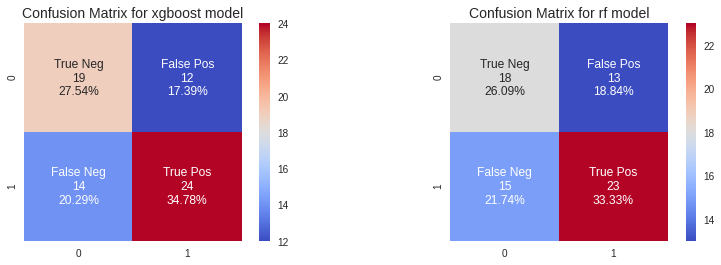

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig = plt.rcParams["figure.figsize"] = (14,4) 

#confusion matrix best algorithm
plt.subplot(1,2,1) 
plt.title(("Confusion Matrix for "+best1N+" model"), fontsize =14)
y_pred1 = best1.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred1)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', square=True)   



#confusion matrix using second best algorithm
plt.subplot(1,2,2)
plt.title(("Confusion Matrix for "+best2N+" model"), fontsize =14)
y_pred2 = best2.predict(x_test)
cf_matrix2 = confusion_matrix(y_test, y_pred2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='coolwarm', square=True)

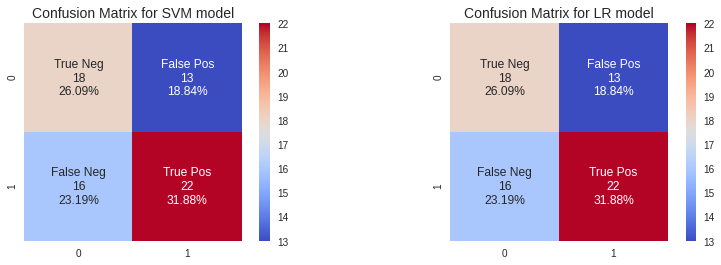

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig = plt.rcParams["figure.figsize"] = (14,4) 

#confusion matrix best algorithm
plt.subplot(1,2,1) 
plt.title(("Confusion Matrix for SVM model"), fontsize =14)
y_pred1 = svm.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred1)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', square=True)   



#confusion matrix using second best algorithm
plt.subplot(1,2,2)
plt.title(("Confusion Matrix for LR model"), fontsize =14)
y_pred2 = lr.predict(x_test)
cf_matrix2 = confusion_matrix(y_test, y_pred2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='coolwarm', square=True)

## explaining the model's predictions using SHAP: Explaining Random forests model

In [ ]:

 #visualize the first prediction's explanation with a force plot
interpret_model(best2, plot = 'reason', observation = 1)

### In blue, we have negative Shap values that show everything that pushes the games success prediction to 0. While the Shap value in red represents everything that pushes it towards a 1 (successful game). Note that this is only for observation number 1.

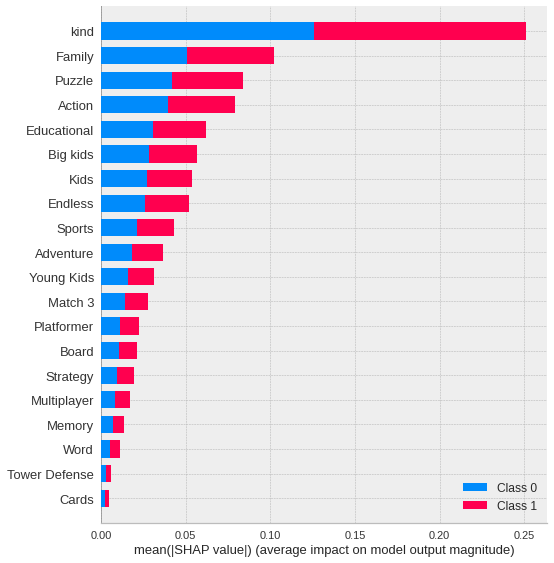

In [ ]:
# Vizualize the impact of features over the prediction process
interpret_model(best2)


In [ ]:
interpret_model(best2, plot = 'reason')


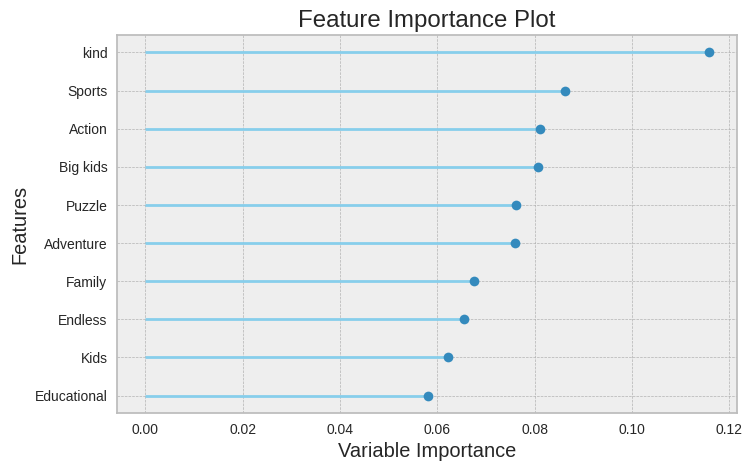

In [ ]:
plot_model(best1,plot='feature')

In [ ]:
plot_model(best1,plot='auc', save=True)


'AUC.png'

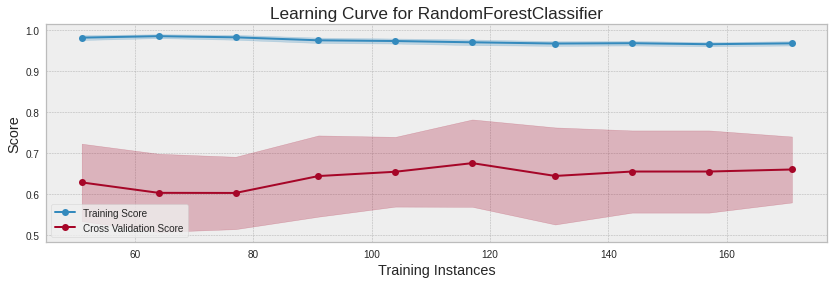

In [ ]:
plot_model(rf,plot='learning')

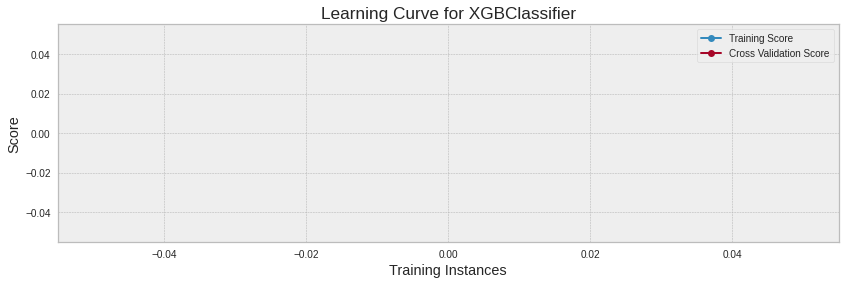

In [ ]:
plot_model(xgboost,plot='learning')

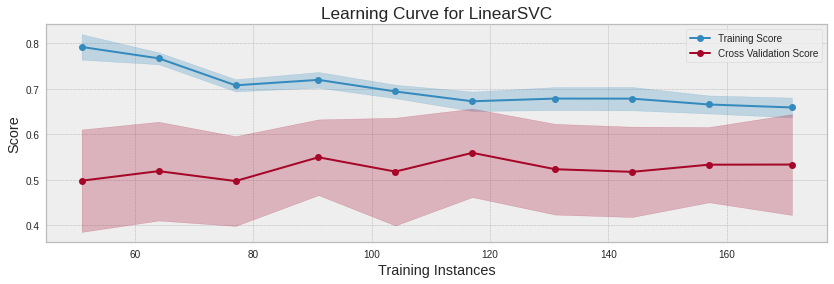

In [ ]:
plot_model(svm,plot='learning')

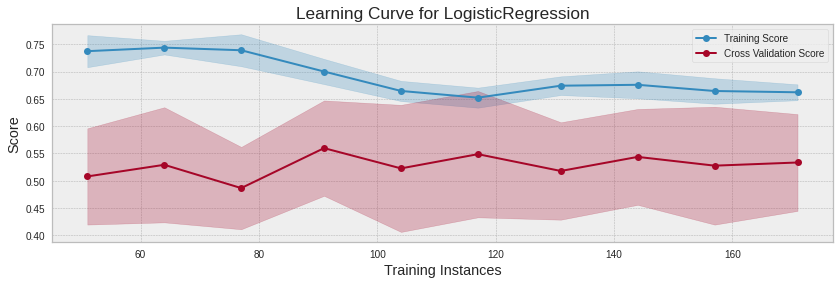

In [ ]:
plot_model(lr,plot='learning')